In [48]:
#Imports and setting up key
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as pltdates

In [ ]:
#TO RUN THE SCRIPT AND UPDATE THE DATABASE - need to improve efficiency?
!python ../data_collection/air_quality.py

In [25]:
con = sql.connect('../data_collection/campus_data.db')
cur = con.cursor()

In [44]:
df_aq = pd.read_sql_query("SELECT * FROM air_quality_all", con)
df_aq['timestamp'] = (pd.to_datetime(df_aq['datetime_utc'], utc = True)).dt.tz_convert("America/Chicago")

In [56]:
latest_date = df_aq.timestamp.max()
#for now... will need to change latest_date to the datetime now

In [ ]:
one_week = latest_date - pd.Timedelta(hours = 24)
df_aq_week = df_aq[df_aq.timestamp >= one_week]

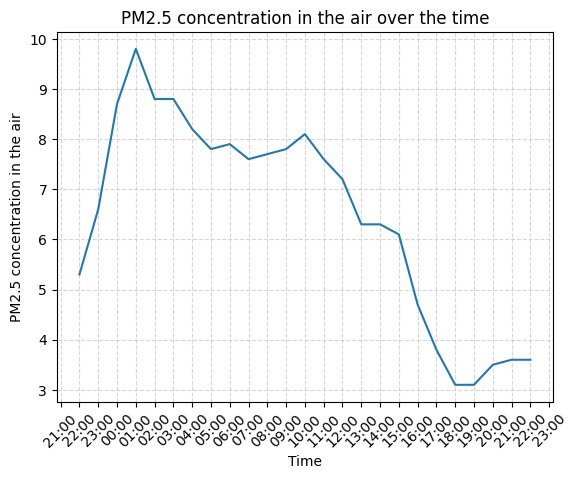

In [55]:
plt.plot(df_aq_week['timestamp'], df_aq_week['value'])
plt.xticks(rotation = 45)
plt.xlabel("Time")
plt.ylabel("PM2.5 concentration in the air")
plt.title("PM2.5 concentration in the air over the time")
plt.gca().xaxis.set_major_locator(pltdates.HourLocator(interval=1))   # every 1 hour
plt.gca().xaxis.set_major_formatter(pltdates.DateFormatter('%H:%M'))  # display hour:minute
plt.grid(True, which='both', linestyle='--', alpha=0.5)